# Проверка гипотез для интернет-магазина на основе A/B-теста

Имеется список гипотез для увеличения выручки интернет-магазина, подготовленный отделом маркетинга. 

**Цель исследования**: 
- приоритизировать имеющиеся гипотезы;
- запустить A/B-тест и проанализировать его результаты;
- принять решение об остановке или продолжении A/B-теста.

## Приоритизация гипотез

Загрузим данные с гипотезами и откроем их.

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приведем названия столбцов к змеиному регистру.

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Приоритизация гипотез с помощью ICE

Применим фреймворк ICE для приоритизации гипотез. Создадим столбец `ICE` и расчитаем его по формуле:
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

Выведем столбцы `hypothesis` и `ICE`, отсортированные по столбцу `ICE`.

In [5]:
pd.options.display.max_colwidth = 200
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6, 2.

### Приоритизация гипотез с помощью RICE

Применим фреймворк *RICE* для приоритизации гипотез. Создадим столбец `RICE` и расчитаем его по формуле:
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [6]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

Выведем столбцы `hypothesis` и `RICE`, отсортированные по столбцу `RICE`.

In [7]:
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по *RICE*: 7, 2, 0, 6, 8.

### Вывод

Были приоритизированы гипотезы из загруженного датафрейма при помощь фреймворков ICE и RICE:
- наиболее перспективные гипотезы по *ICE*: 8, 0, 7, 6, 2;
- наиболее перспективные гипотезы по *RICE*: 7, 2, 0, 6, 8.

Разница при приоритизации этими двумя фреймворками объясняется тем, что при расчете *RICE*, в отличие от *ICE*, мы учитываем параметр Reach – количество пользователей, которое затронет изменение при принятии гипотезы.

## Анализ A/B-теста

Откроем файлы с результатами проведенного A/B-теста.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders.info()
print(50 * '-')
visitors.info()

display(orders.head(), 50 * '-', visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


'--------------------------------------------------'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Изменим тип данных столбцов с датами на 'datetime'.

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим.

In [11]:
orders.info()
print(50 * '-')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим датафреймы на дубликаты.

In [12]:
display(orders.duplicated().sum(), '-',
        visitors.duplicated().sum())

0

'-'

0

Дубликатов нет.

Проверим доли по количеству посетителей по группам теста.

In [13]:
f"В группе B на {round((visitors[visitors['group'] == 'B']['visitors'].sum() / visitors[visitors['group'] == 'A']['visitors'].sum() - 1) * 100, 3)}% больше посетителей, чем в группе A."

'В группе B на 0.961% больше посетителей, чем в группе A.'

Разница не более 1%: группы примерно равны по размеру.

Посчитаем количество пользователей, которые делали заказы в обеих группах.

In [14]:
mask = orders.loc[orders['group'] == 'B', 'visitorId'].isin(orders.loc[orders['group'] == 'A', 'visitorId'])
visitorId = orders.loc[orders['group'] == 'B', 'visitorId']
visitorId[mask].nunique()

58

58 пользователей совершали заказы, находясь в обеих группах. 

Мы не можем их удалить, так как таблица с визитами агрегирована, поэтому придется их оставить.

### Построение графика кумулятивной выручки по группам

Для построения графика создадим датафрейм `cumulativeData` с кумулятивными данными.
Сначала создадим массив уникальных значений дат и групп теста.

In [15]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Теперь создадим агрегированные датафреймы для `orders` и `visitors` с кумулятивными данными для каждой даты с количеством заказов и пользователей и суммой средних чеков или сумой посетителей.

In [16]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group']
    )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum'
        }), 
    axis=1
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group']
    )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum'
        }), 
    axis=1
).sort_values(by=['date', 'group'])

Объединим датафреймы и переименуем столбцы.

In [17]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах A и B.

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

Построим графики кумулятивной выручки по группам.

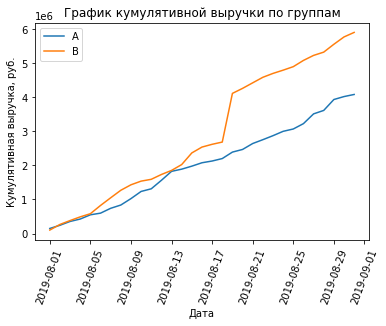

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка, руб.')
plt.xticks(rotation=70)
plt.legend()
plt.show()

#### Вывод
Графики кумулятивной выручки почти равномерно растут в обеях группах. Но в некоторых местах график резко возрастает: это может говорить о выбросах (либо большое количество заказов либо очень большой заказ).

### Построение графика кумулятивного среднего чека по группам

Построим графики кумулятивного среднего чека по группам.

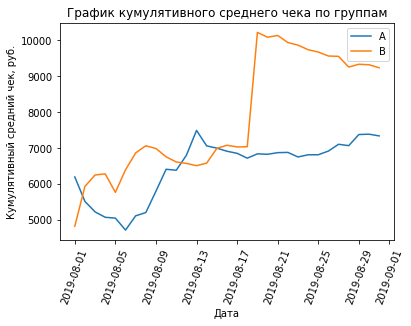

In [20]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек, руб.')
plt.xticks(rotation=70)
plt.legend()
plt.show()

#### Вывод
Средний чек установился для группы A, а для группы B нет: ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Принимать решение по этой метрике рано. Также есть аномалии: резкие скачки графика.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A 
<a id='section3'></a>

Объединим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах A и B.

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

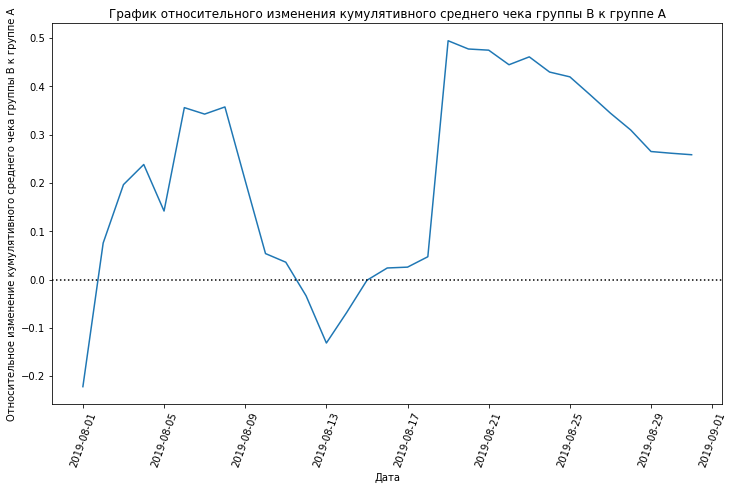

<Figure size 504x1008 with 0 Axes>

In [22]:
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, linestyle=':', color='black')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=70)
plt.figure(figsize=(7, 14))
plt.show()

#### Вывод
График относительного изменения кумулятивного среднего чека группы B к группе A резко менялся в некоторые даты: скорее всего, в эти даты произошли аномалии.

### Построение графика кумулятивной конверсии по группам

Создадим новый столбец с конверсией.

In [23]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

Создадим датафреймы с кумулятивными данными по группам и построим графики кумулятивной конверсии по группам.

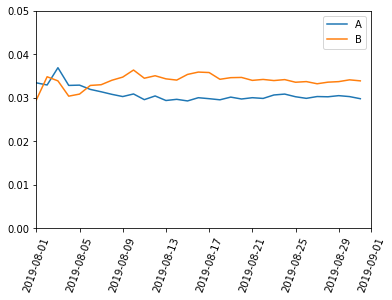

In [24]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xticks(rotation=70)
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()

#### Вывод
В начале теста группа A имела большую конверсию, чем группа B, но в дальнейшем графики выровнялись: конверсия группы B стабилизировалась около большего значения, чем конверсия группы A.

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A 
<a id='section5'></a>

Построим график относительного изменения кумулятивных конверсий.

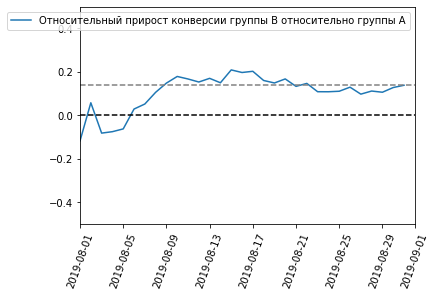

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')

plt.xticks(rotation=70)
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5]) 
plt.show()

#### Вывод
Почти с самого начала группа B лидирует по конверсии: сейчас она зафиксировалась около прироста примерно в 15% относительно группы A.

### Построение точечного графика количества заказов по пользователям

Создадим датафрейм количества заказов по пользователям и переименуем столбцы.

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим точечный график количества заказов по пользователям.

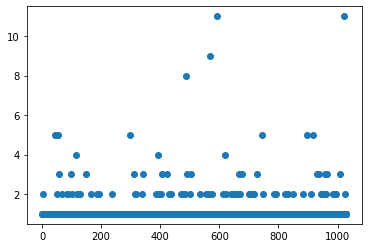

In [27]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

#### Вывод
По точечному графику количества заказов по пользователям видно, что пользователей, сделавших больше двух заказов, очень мало. Скорее всего, это аномалии.

### Рассчет 95-го и 99-го перцентилей количества заказов на пользователя

Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [28]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

#### Вывод
Не более 5% пользователей совершали более 2 заказов и не более 1% – 4 заказа. Можно выбрать 2 заказ как нижнюю границу аномальных значений.

### Построение точечного графика стоимостей заказов

Аналогично пункту 2.6 построим точечный график стоимостей заказов.

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


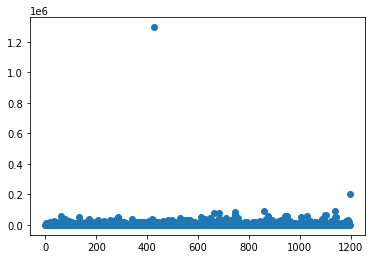

In [29]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

#### Вывод
Заказов стоимостью более 100000 руб. почти нет. Скорее всего, это нижняя граница аномальных значений.

### Рассчет 95-го и 99-го перцентилей стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### Вывод
Не более 5% заказов имеют стоимость более 28000 руб., не более 1% закозов – стоимость более 58233 руб. Выберем нижнюю границу аномальных значений 28000 руб.

### Рассчет статистической значимости различий в среднем количестве заказов между группами по «сырым» данным

Создадим датафрейм `data` с данными о количестве и выручке заказов, количестве пользователей по выбранной и дате и кумулятивными данными с этими значениями.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Проверим гипотезу об отсутствии статистически значимой разницы конверсии в группах A и B для "сырых" данных.

Нулевая гипотеза $H_0$: конверсия в группе A равна конверсии в группе B.

Альтернативная гипотеза $H_1$: конверсия в группе A не равна конверсии в группе B.

Рассчитаем p-value для сравнения конверсии между группами с помощью критерия Манна-Уитни (критический уровень статистической значимости для всех тестов выберем равным $\alpha = 5\% $. Также рассчитаем относительный прирост средней конверсии группы B.

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост средней конверсии: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный прирост средней конверсии: 0.138


#### Вывод
p-value меньше 5%, поэтому нулевую гипотезу $H_0$ об отсутствии статистически значимой разницы конверсии в группах A и B по "сырым" данным отвергаем.

### Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Проверим гипотезу об отсутствии статистически значимой разницы в среднем чеке заказа в группах A и B для "сырых" данных. 

Нулевая гипотеза $H_0$: средний чек заказа в группе A равен среднему чеку заказа в группе B.

Альтернативная гипотеза $H_1$: средний чек заказа в группе A равен среднему чеку заказа в группе B.

Рассчитаем p-value для сравнения среднего чека заказа между группами с помощью критерия Манна-Уитни. Также рассчитаем относительный прирост среднего чека заказа группы B.

In [33]:
print("p-value: {0:.3f}"
      .format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                              orders[orders['group']=='B']['revenue'])[1]))

print("Относительный прирост среднего чека заказа: {0:.3f}"
      .format(
          orders[orders['group']=='B']['revenue'].mean() / 
          orders[orders['group']=='A']['revenue'].mean() - 1
      )
     )

p-value: 0.729
Относительный прирост среднего чека заказа: 0.259


#### Вывод
p-value значительно больше 5%, поэтому статистически значимых отличий в среднем чеке между группами нет.
Не можем отвергнуть нулевую гипотезу $H_0$ об отсутствии статистически значимой разницы в среднем чеке заказа в группах A и B по "сырым" данным.

### Рассчет статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным

"Очистим" данные от аномалий установленным нами ранее нижним границам аномальных значений. Найдем аномальных пользователей.

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print("p-value: {0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост средней конверсии: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01304
Относительный прирост средней конверсии: 0.173


Проверим гипотезу об отсутствии статистически значимой разницы конверсии в группах A и B для "очищенных" данных. Рассчитаем p-value для сравнения конверсии между группами с помощью критерия Манна-Уитни. Также рассчитаем относительный прирост средней конверсии группы B.

#### Вывод
p-value меньше 5%, поэтому нулевую гипотезу $H_0$ об отсутствии статистически значимой разницы конверсии в группах A и B по "очищенным" данным отвергаем.

### Рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Проверим гипотезу об отсутствии статистически значимой разницы в среднем чеке заказа в группах A и B для "очищенных" данных. 

Нулевая гипотеза $H_0$: средний чек заказа в группе A равен среднему чеку заказа в группе B.

Альтернативная гипотеза $H_1$: средний чек заказа в группе A равен среднему чеку заказа в группе B.

Рассчитаем p-value для сравнения среднего чека заказа между группами с помощью критерия Манна-Уитни. Также рассчитаем относительный прирост среднего чека заказа группы B.

In [37]:
print(
    "p-value: {0:.3f}".format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека заказа: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
Относительный прирост среднего чека заказа: -0.020


#### Вывод

p-value значительно больше 5%, поэтому статистически значимых отличий в среднем чеке между группами нет.
Также не можем отвергнуть гипотезу об отсутствии статистически значимой разницы в среднем чеке заказа в группах A и B по "очищенным" данным.

### Решение об остановке A/B-теста

Имеем:
- есть статистически значимое различие по средней конверсии между группами по "сырым" и "очищенным" данным;
- нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по "очищенным" данным;
- по [графику относительного изменения кумулятивных конверсий](#section5) видно, что результаты группы B лучше результатов группы A: относительный прирост конверсии стабилизировался около 15%;

Получается, что средний чек одинаков в обеих группах, а конверсия выше в группе B: значит, группа B показала лучшие результаты, чем группа A. 

Остановим тест, зафиксируем победу группы B.